In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/nayak_pratheek17/Documents/A5.csv')
df

,Hours,Scores
0,2,13
1,2,20
2,3,23
3,5,43
4,6,34
5,7,36
6,8,42
7,3,44
8,7,53
9,9,32


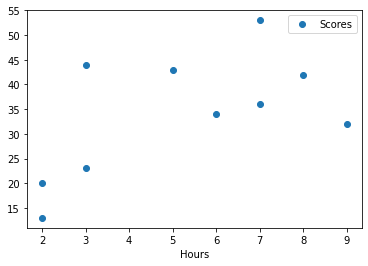

In [3]:
df.plot(x = "Hours", y = "Scores", style = "o")
plt.show()

In [4]:
x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)

5.2 34.0


In [6]:
df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"] ** 2
df["y^2"] = df["y"] ** 2
df

,Hours,Scores,x,y,x*y,x^2,y^2
0,2,13,-3.2,-21.0,67.2,10.24,441.0
1,2,20,-3.2,-14.0,44.8,10.24,196.0
2,3,23,-2.2,-11.0,24.2,4.84,121.0
3,5,43,-0.2,9.0,-1.8,0.04,81.0
4,6,34,0.8,0.0,0.0,0.64,0.0
5,7,36,1.8,2.0,3.6,3.24,4.0
6,8,42,2.8,8.0,22.4,7.84,64.0
7,3,44,-2.2,10.0,-22.0,4.84,100.0
8,7,53,1.8,19.0,34.2,3.24,361.0
9,9,32,3.8,-2.0,-7.6,14.44,4.0


In [8]:
summation_xy = df["x*y"].sum()
summation_xsquared = df["x^2"].sum()
summation_ysquared = df["y^2"].sum()

In [9]:
summation_xy, summation_xsquared, summation_ysquared

(165.0, 59.6, 1372.0)

In [10]:
correlation = summation_xy / (summation_xsquared * summation_ysquared) ** 0.5
correlation

0.577010556424687

In [11]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum / len(numbers)
        return current_avg



In [12]:
def getStdDev(numbers):
    if(len(numbers) == 0):
        return 0
    else:
        mean = getMean(numbers)
        stdDev = 0
        for i in numbers:
            stdDev += (i - mean) ** 2
        return (stdDev/len(numbers)) ** 0.5

In [14]:
stdDevX = getStdDev(df["x"].tolist())
stdDevY = getStdDev(df["y"].tolist())
print(stdDevX, stdDevY)


2.4413111231467406 11.713240371477058


In [15]:
m = correlation * stdDevY / stdDevX
m

2.7684563758389267

In [16]:
c = df["Scores"].mean() - m * df["Hours"].mean()
c

19.60402684563758

In [17]:
df["Y_pred"] = m * df["Hours"] + c

In [18]:
df

,Hours,Scores,x,y,x*y,x^2,y^2,Y_pred
0,2,13,-3.2,-21.0,67.2,10.24,441.0,25.140940
1,2,20,-3.2,-14.0,44.8,10.24,196.0,25.140940
2,3,23,-2.2,-11.0,24.2,4.84,121.0,27.909396
3,5,43,-0.2,9.0,-1.8,0.04,81.0,33.446309
4,6,34,0.8,0.0,0.0,0.64,0.0,36.214765
5,7,36,1.8,2.0,3.6,3.24,4.0,38.983221
6,8,42,2.8,8.0,22.4,7.84,64.0,41.751678
7,3,44,-2.2,10.0,-22.0,4.84,100.0,27.909396
8,7,53,1.8,19.0,34.2,3.24,361.0,38.983221
9,9,32,3.8,-2.0,-7.6,14.44,4.0,44.520134


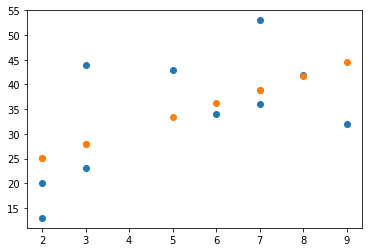

In [19]:
plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.scatter(df["Hours"], df["Y_pred"])
plt.show()

In [20]:
df["costVals"] = (df["Scores"] - df["Y_pred"]) ** 2

In [21]:
df

,Hours,Scores,x,y,x*y,x^2,y^2,Y_pred,costVals
0,2,13,-3.2,-21.0,67.2,10.24,441.0,25.140940,147.402414
1,2,20,-3.2,-14.0,44.8,10.24,196.0,25.140940,26.429260
2,3,23,-2.2,-11.0,24.2,4.84,121.0,27.909396,24.102169
3,5,43,-0.2,9.0,-1.8,0.04,81.0,33.446309,91.273017
4,6,34,0.8,0.0,0.0,0.64,0.0,36.214765,4.905184
5,7,36,1.8,2.0,3.6,3.24,4.0,38.983221,8.899610
6,8,42,2.8,8.0,22.4,7.84,64.0,41.751678,0.061664
7,3,44,-2.2,10.0,-22.0,4.84,100.0,27.909396,258.907538
8,7,53,1.8,19.0,34.2,3.24,361.0,38.983221,196.470080
9,9,32,3.8,-2.0,-7.6,14.44,4.0,44.520134,156.753761


In [24]:
cost = df["costVals"].sum() / 10

In [25]:
cost

91.52046979865773

In [26]:
y_mean 


34.0

In [27]:
df["ssrVals"] = (df["Y_pred"] - y_mean) ** 2
df

,Hours,Scores,x,y,x*y,x^2,y^2,Y_pred,costVals,ssrVals
0,2,13,-3.2,-21.0,67.2,10.24,441.0,25.140940,147.402414,78.482951
1,2,20,-3.2,-14.0,44.8,10.24,196.0,25.140940,26.429260,78.482951
2,3,23,-2.2,-11.0,24.2,4.84,121.0,27.909396,24.102169,37.095457
3,5,43,-0.2,9.0,-1.8,0.04,81.0,33.446309,91.273017,0.306574
4,6,34,0.8,0.0,0.0,0.64,0.0,36.214765,4.905184,4.905184
5,7,36,1.8,2.0,3.6,3.24,4.0,38.983221,8.899610,24.832496
6,8,42,2.8,8.0,22.4,7.84,64.0,41.751678,0.061664,60.088510
7,3,44,-2.2,10.0,-22.0,4.84,100.0,27.909396,258.907538,37.095457
8,7,53,1.8,19.0,34.2,3.24,361.0,38.983221,196.470080,24.832496
9,9,32,3.8,-2.0,-7.6,14.44,4.0,44.520134,156.753761,110.673224


In [30]:
ssr = df["ssrVals"].sum() / 10

In [31]:
ssr

45.679530201342295

In [32]:
sst = ssr + cost

In [33]:
sst

137.20000000000002

In [36]:
rSqured = 1 - (cost/sst)
rSqured

0.3329411822255268